# Практикум 4: функции
## [Ссылка на неизменяемую версию практикума](https://github.com/glebdovzhenko/PythonCourse01/blob/main/Prakt4.ipynb)

## Функции

Функции это выделенные блоки кода которые можно многократно исполнять. Функции бывают именованные и безымянные. Именованные функции создаются с помощью ключевого слова `def` и затем могут по этому имени вызываться
```Python
def f(p1, p2, p3):  # определяем f как функцию трёх аргументов, которые внутри функции будем называть p1, p2, p3
    ...  # какие-то действия
    res = ...  # создаём переменную-результат
    return res  #  возвращаем результат
...
a1 = f(1, 2, 3)  
a2 = f(4, 5, 6)
a3 = f(0, 0, 0)  # использовали функцию несколько раз
```

Безымянные функции создаются с помощью ключевого слова `lambda` и, как правило, используются один раз в конструкциях вроде `map`, `reduce`, `filter`. Лямбда-функции в питоне состоят из одного выражения и возвращают его результат, например
```Python
lambda a, b: a + b  # функция принимает два аргумента и возвращает их сумму
```
Возможно записать лямбда-функцию в переменную и сделать функцию именованной, однако это плохой стиль программирования, так делать не рекомендуется. Следующие две записи эквивалентны:
```Python
def f1(a, b):
    return a + b

f1 = lambda a, b: a + b
```
Осознайте это как возможность языка и никогда второй способ определения функций не используйте. Правильное применение лямбда-функций будет описано ниже.

# Пространство имён

Совокупность всех доступных в данном блоке кода переменных, классов, функций и ключевых слов называется пространством имён (namespace).

Если вы определяете какую-то переменную внутри функции и не передаёте её наружу с помощью ключевого слова `return`, переменная будет недоступна снаружи функции.

In [1]:
# определяем функцию f1
def f1(x):
    tmp = x**2
    return x

# вызываем функцию f1, записываем результат в переменную a
a = f1(2)
print(a)  # печатаем a
print(tmp)  # эта строка кода выдаёт ошибку, т.к. мы пытаемся обратиться к переменной tmp вне пространства имён в котором она определена

2


NameError: name 'tmp' is not defined

Однако, переменные определённые снаружи функции (если они не внутри какой-то другой функции) доступны внутри неё.

In [2]:
a = 3  # определяем переменную снаружи функции

def f2(x):
    result = x + a  # имеем доступ к переменной внутри функции, но только на чтение!! 
    # попытка записать что-то в a приведёт либо к созданию локальной переменной a, доступной только внутри функции, либо к ошибке.
    return result

b = f2(2)
print(b)
print(a)

5
3


## Концепция чистоты функций

Нужно стремиться к тому, чтобы делать все функции [чистыми](https://ru.wikipedia.org/wiki/Чистота_функции). Это означает пользоваться внутри функции только теми переменными, которые были переданы в неё как аргументы, а все нужные вне тела функции результаты возвращать с помощью `return`. В частности, не рекомендуется пользоваться глобальными переменными внутри функций.

## Пример

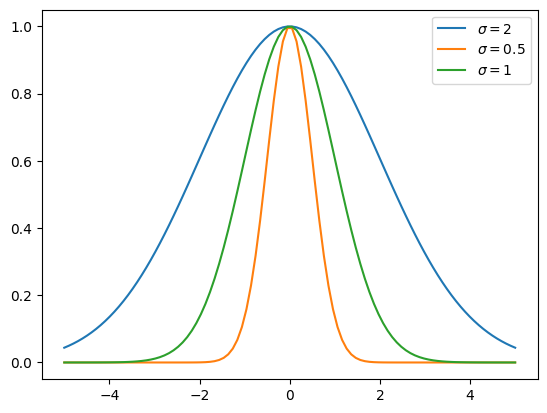

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# определяем функцию gaussian
def gaussian(x, x0, c, a):
    x_scaled = (x - x0)/c
    return np.exp(-0.5 * x_scaled**2)

xs = np.linspace(-5., 5., 100)

# используем функцию gaussian с разными наборами параметров
plt.plot(xs, gaussian(xs, 0, 2, 1), label='$\sigma=2$')
plt.plot(xs, gaussian(xs, 0, 0.5, 1), label='$\sigma=0.5$')
plt.plot(xs, gaussian(xs, 0, 1, 1), label='$\sigma=1$')
plt.legend()

## Задача 1

Напишите функцию `lorentz` аналогичную предыдущему примеру реализующую [распределение Лоренца](https://ru.wikipedia.org/wiki/Распределение_Коши). Постройте аналогичные графики с различными значениями параметров.

In [4]:
# здесь будет ваш код

## Задача 2
С помощью написанных вами функций `gauss` и `lorentz` напишите функцию реализующую [профиль псевдо-Войта](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D1%84%D0%B8%D0%BB%D1%8C_%D0%A4%D0%BE%D0%B9%D0%B3%D1%82%D0%B0#%D0%9F%D1%80%D0%B8%D0%B1%D0%BB%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BF%D1%81%D0%B5%D0%B2%D0%B4%D0%BE%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%A4%D0%BE%D0%B9%D0%B3%D1%82%D0%B0). Постройте графики с разными значениями $\eta$.

In [5]:
# здесь будет ваш код

## Задача 3
Напишите реализацию функции `add_noise`, которая добавляет к переданному в неё сигналу в виде numpy-массива равномерно распределённый вокруг нуля шум заданной амплитуды. Значение амплитуды передайте в функцию в виде параметра.
Подсказка: обратите внимание на `numpy.random.rand` (как в задаче 3 из предыдущей практики)
Подсказка: чтобы сгенерировать массив того же размера что и переданный в в функцию `arr`, обратите внимание на то что у массивов есть поля `.shape`, `.size`

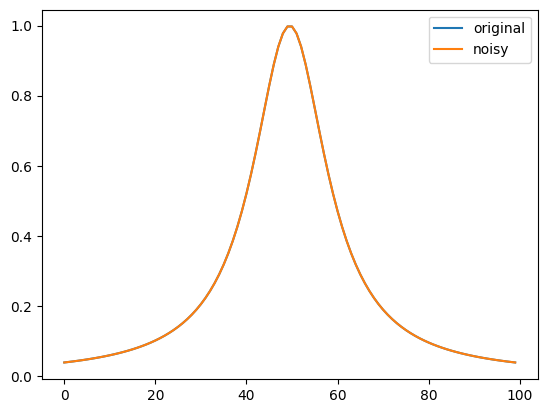

In [6]:
import numpy as np
from matplotlib import pyplot as plt

# текущая реализация просто возвращает массив в том виде в каком он был
# добавьте в функцию ещё один аргумент (амплитуду)
# реализуйте функцию так, чтобы она работала для массива arr любого размера!
def add_noise(arr):
    return arr

init_data = 1/(np.linspace(-5, 5, 100)**2 + 1)
noisy_data = add_noise(init_data)

plt.plot(init_data, label='original')
plt.plot(noisy_data, label='noisy')
plt.legend()

## Работа с лямбда-функциями. Функции map, reduce, filter.

`map(function, iterable)` применяет функцию function к каждому элементу контейнера iterable. Возвращает объект специального типа `map`. 
Его можно использовать как есть в цикле `for`, но чтобы вывести результат в виде списка, нужно сделать приведение типов.

In [12]:
# функция lambda x: x**2 возвращает значение переданного в него аргумента в квадрате

print(map(lambda x: x**2, [1, 2, 3, 4]))  # объект типа map
print(list(map(lambda x: x**2, [1, 2, 3, 4])))  # объект типа map приведённый к списку, т.е. список

for el in map(lambda x: x**2, [1, 2, 3, 4]):
    print(el)

[1, 4, 9, 16]
1
4
9
16


`reduce(function, iterable)` кумулятивно применяет функцию function (она должна принимать два аргумента) к элементам контейнера. 
То есть если при вызове `reduce(func, [a, b, c, d])`, то будет происходить следующее:

1. Сначала вычисляется r1 = func(a, b)
2. Затем r2 = func(r1, c)
3. Затем r3 = func(r2, d) и это и будет возвращено как результат работы `reduce`.



In [13]:
from functools import reduce
# lambda a, b: a if a > b else b возвращает бОльший из двух аргументов функции
reduce(lambda a, b: a if a > b else b, [1, 7, 2, 3, 4, 5])  # возвращает максимальный элемент списка

7

`filter(function, iterable)` делает выборку элементов контейнера удовлетворяющих условию `function(element)`. Возвращает объект специального типа `filter`. Так же как и `map` чтобы иметь доступ к элементам, его нужно привести к типу `list`, а в цикле `for` можно использовать как есть. 

In [14]:
# lambda x: x > 5 возвращает True если аргумент >5 и False если нет
print(filter(lambda x: x > 5, [3, 6, 7, 4, 3, 5]))
print(list(filter(lambda x: x > 5, [3, 6, 7, 4, 3, 5])))

for el in filter(lambda x: x > 5, [3, 6, 7, 4, 3, 5]):
    print(el)

[6, 7]
6
7


## Задача 4
Напишите функцию reduce которая бы вернула сумму всех элементов списка

In [15]:
# здесь будет ваш код

# Задача 5
Функция `os.listdir` возвращает список всех файлов и папок находящихся в директории.
С помощью функции `filter` выведите на печать только файлы с расширением .txt из папки `Prakt2/task5`.

Подсказка: обратите внимание на функцию `str.endswith()`

In [16]:
import os

print(os.listdir('Prakt2/task5'))

# здесь будет ваш код

['f1.txt', 'f3.txt', 'f2.txt', 'some.garbage', '.ipynb_checkpoints']
